In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
# 1,1,3,128,128 => 1-sample/batch_size, 1-channels, 3 - #frames, 128 - height, 128 - width
x = torch.rand((1,1,3,128,128))
y = torch.rand((1,1,1,64,64))

In [3]:
x.shape,y.shape

(torch.Size([1, 1, 3, 128, 128]), torch.Size([1, 1, 1, 64, 64]))

In [4]:
class Conv3D(nn.Module):

    '''
    Performs 3D convolution
    '''

    def __init__(self):

        super(Conv3D, self).__init__()
        self.conv1 = self._convblock(1,16,3,3,False)
        self.conv2 = self._convblock(16,32,1,3,False)
        self.conv3 = self._convblock(32,16,1,3,False)
        self.conv4 = self._convblock(16,1,1,3,True)

    def _convblock(self,in_channels,out_channels,ksized,ksize,last):
        '''
        Makes a block of layers (Conv3d,ReLU,Maxpool3d,BatchNorm3d(only if !last))
        '''

        l1 = nn.Conv3d(in_channels=in_channels,out_channels=out_channels,kernel_size=(ksized,ksize,ksize))
        l2 = nn.ReLU()
        if last:
            return nn.Sequential(l1,l2)
        else:
            l3 = nn.MaxPool3d((1, 1, 1))
            l4 = nn.BatchNorm3d(out_channels)
            return nn.Sequential(l1,l2,l3,l4)
        
        
    def forward(self,x):

        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)

        return out


In [5]:
model = Conv3D()

In [6]:
print(model)

Conv3D(
  (conv1): Sequential(
    (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv3d(16, 32, kernel_size=(1, 3, 3), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv3d(32, 16, kernel_size=(1, 3, 3), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv3d(16, 1, kernel_size=(1, 3, 3), stride=(1, 1, 1))
    (1): ReLU()

In [7]:
out = model(x)
out.shape

torch.Size([1, 1, 1, 120, 120])

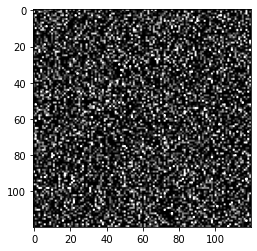

In [8]:
plt.imshow(out.detach().numpy().reshape((120,120)), cmap='gray', vmin=0, vmax=1)
plt.show()

In [29]:
torch.save(model,'model.pt')

In [ ]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, files, labels, preprocess=None, batch_size = 50, dim=(160,160), n_channels=1, n_classes=16, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.files = files
        self.preprocess = preprocess or (lambda x : x)
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.files)/self.batch_size))
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        files_temp = [self.files[k] for k in indexes]
        
        X,z = self.__data_generation(files_temp)
        return [X,z], None
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.files))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, files_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        z = np.empty((self.batch_size),dtype=int)
        for i,file in enumerate(files_temp):
            X[i,] = cv2.copyMakeBorder(self.preprocess(cv2.imread(file)), 0, 0, 20, 20, cv2.BORDER_CONSTANT, (0,0,0)).reshape(*self.dim, self.n_channels)/255.
            y = avg(k=4,images)
            z[i] = self.labels[file]
        return X, keras.utils.to_categorical(z, num_classes=self.n_classes)


In [3]:
cd /home/ishikaa/Downloads/

/home/ishikaa/Downloads


In [32]:
# override = False

# frames = []
# frames_name = []
# outliers = []
# for folder in tqdm(sorted(os.listdir(os.getcwd()+'/GaitDatasetB-silh'))):
#     for subfolder in sorted(os.listdir( '/'.join([os.getcwd(),'GaitDatasetB-silh',folder]))):
#         for angle in sorted(os.listdir( '/'.join([os.getcwd(),'GaitDatasetB-silh', folder,subfolder]))):
#             for file in sorted(os.listdir( '/'.join([os.getcwd(),'GaitDatasetB-silh', folder,subfolder,angle]))):
#              frames.append(
#                 cv2.imread(
#                     '/'.join(
#                         [os.getcwd(),
#                         'GaitDatasetB-silh/',
#                         folder,
#                         subfolder,
#                         angle,
#                         file])
#                     )
#                 )

In [ ]:
frames = []
x = []

sub = 0
for subfolder in sorted(os.listdir( '/'.join([os.getcwd(),'GaitDatasetB-silh','001']))):
    subject = []
    sub +=1
    for file in sorted(os.listdir( '/'.join([os.getcwd(),'GaitDatasetB-silh', '001',subfolder,'090']))):
        subject.append(
                cv2.imread(
                    '/'.join(
                        [os.getcwd(),
                        'GaitDatasetB-silh/',
                        '001',
                        subfolder,
                        '090',
                        file])
                    )
                )


In [42]:
sorted(os.listdir( '/'.join([os.getcwd(),'GaitDatasetB-silh', '001',sub])))

['000', '018', '036', '054', '072', '090', '108', '126', '144', '162', '180']

In [41]:
sub = 'bg-01'

In [44]:
import c